## COVID Dashboard: 

### London NHS Region


### The data presented in this dashboard presents the progress of the coronavirus pandemic from March 2020 to October 2021 with regards to Hospital Cases, New Admissions and Transmission Growth Rate Max & Min. The data was sourced from [GOV.UK](https://coronavirus.data.gov.uk/details/download)


##### Last updated 27/10/21

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import json

In [2]:
# an iPython  "magic" that enables the embedding of matplotlib output
%matplotlib inline
# make figures larger
plt.rcParams['figure.dpi'] = 100

#### Loading and processing data

In [3]:
with open("nhsRegion_2021-10-26.json", "rt") as INFILE:
    data=json.load(INFILE)

In [4]:
#data

{'body': [{'areaType': 'nhsRegion',
   'areaCode': 'E40000003',
   'areaName': 'London',
   'date': '2021-10-26',
   'hospitalCases': 1046,
   'newAdmissions': None,
   'transmissionRateGrowthRateMax': None,
   'transmissionRateGrowthRateMin': None},
  {'areaType': 'nhsRegion',
   'areaCode': 'E40000003',
   'areaName': 'London',
   'date': '2021-10-25',
   'hospitalCases': 1044,
   'newAdmissions': None,
   'transmissionRateGrowthRateMax': None,
   'transmissionRateGrowthRateMin': None},
  {'areaType': 'nhsRegion',
   'areaCode': 'E40000003',
   'areaName': 'London',
   'date': '2021-10-24',
   'hospitalCases': 1003,
   'newAdmissions': 96,
   'transmissionRateGrowthRateMax': None,
   'transmissionRateGrowthRateMin': None},
  {'areaType': 'nhsRegion',
   'areaCode': 'E40000003',
   'areaName': 'London',
   'date': '2021-10-23',
   'hospitalCases': 993,
   'newAdmissions': 93,
   'transmissionRateGrowthRateMax': None,
   'transmissionRateGrowthRateMin': None},
  {'areaType': 'nhsRegion

In [5]:
datalist=data['body']
#datalist

[{'areaType': 'nhsRegion',
  'areaCode': 'E40000003',
  'areaName': 'London',
  'date': '2021-10-26',
  'hospitalCases': 1046,
  'newAdmissions': None,
  'transmissionRateGrowthRateMax': None,
  'transmissionRateGrowthRateMin': None},
 {'areaType': 'nhsRegion',
  'areaCode': 'E40000003',
  'areaName': 'London',
  'date': '2021-10-25',
  'hospitalCases': 1044,
  'newAdmissions': None,
  'transmissionRateGrowthRateMax': None,
  'transmissionRateGrowthRateMin': None},
 {'areaType': 'nhsRegion',
  'areaCode': 'E40000003',
  'areaName': 'London',
  'date': '2021-10-24',
  'hospitalCases': 1003,
  'newAdmissions': 96,
  'transmissionRateGrowthRateMax': None,
  'transmissionRateGrowthRateMin': None},
 {'areaType': 'nhsRegion',
  'areaCode': 'E40000003',
  'areaName': 'London',
  'date': '2021-10-23',
  'hospitalCases': 993,
  'newAdmissions': 93,
  'transmissionRateGrowthRateMax': None,
  'transmissionRateGrowthRateMin': None},
 {'areaType': 'nhsRegion',
  'areaCode': 'E40000003',
  'areaName

In [35]:
dates=[dictionary['date'] for dictionary in datalist ]
dates.sort()
#dates

In [7]:
def parse_date(datestring):
    """ Convert a date string into a pandas datetime object """
    return pd.to_datetime(datestring, format="%Y-%m-%d")

In [8]:
startdate=parse_date(dates[0])
enddate=parse_date(dates[-1])
#print (startdate, ' to ', enddate)

In [9]:
index=pd.date_range(startdate, enddate, freq='D')
timeseriesdf=pd.DataFrame(index=index, columns=['hospitalCases', 'newAdmissions', 'transmissionRateGrowthRateMax','transmissionRateGrowthRateMin'])
#timeseriesdf

#### Creating time series data frame

In [33]:
index=pd.date_range(startdate, enddate, freq='D')
timeseriesdf=pd.DataFrame(index=index, columns=['hospitalCases', 'newAdmissions', 'transmissionRateGrowthRateMax','transmissionRateGrowthRateMin'])
#timeseriesdf.head(7)

### Time series data and json data frame

In [34]:
for entry in datalist: # each entry is a dictionary with date, cases, hospital and deaths
    date=parse_date(entry['date'])
    for column in ['hospitalCases', 'newAdmissions', 'transmissionRateGrowthRateMax','transmissionRateGrowthRateMin']:
        # check that nothing is there yet - just in case some dates are duplicated,
        # maybe with data for different columns in each entry
        if pd.isna(timeseriesdf.loc[date, column]): 
            # replace None with 0 in our data 
            value= float(entry[column]) if entry[column]!=None else 0.0
            # this is the way you access a specific location in the dataframe - use .loc
            # and put index,column in a single set of [ ]
            timeseriesdf.loc[date, column]=value
            
# fill in any remaining "holes" due to missing dates
timeseriesdf.fillna(0.0, inplace=True)
            
timeseriesdf.tail(7)



,hospitalCases,newAdmissions,transmissionRateGrowthRateMax,transmissionRateGrowthRateMin
2021-10-20,959.0,101.0,0.0,0.0
2021-10-21,979.0,71.0,0.0,0.0
2021-10-22,969.0,109.0,0.0,0.0
2021-10-23,993.0,93.0,0.0,0.0
2021-10-24,1003.0,96.0,0.0,0.0
2021-10-25,1044.0,0.0,0.0,0.0
2021-10-26,1046.0,0.0,0.0,0.0


### Plot Showing Data for Hospital Cases and New Admissions 

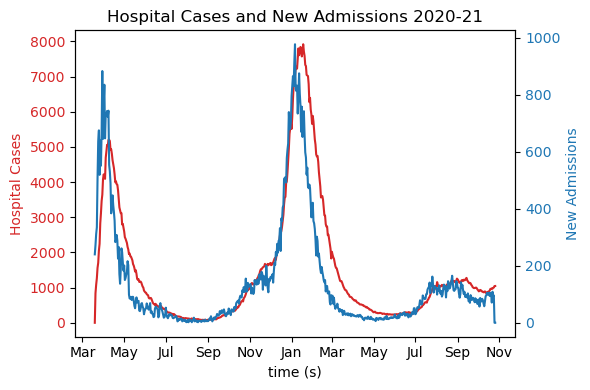

In [12]:
#import numpy as np
#import matplotlib.pyplot as plt
import matplotlib.dates as mdates
myFmt = mdates.DateFormatter ('%b')

data1=timeseriesdf['hospitalCases']
data2=timeseriesdf['newAdmissions']

fig, ax1 = plt.subplots()
plt.title('Hospital Cases and New Admissions 2020-21')
color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Hospital Cases', color=color)
ax1.plot(data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.xaxis.set_major_formatter(myFmt)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('New Admissions', color=color)  # we already handled the x-label with ax1
ax2.plot(data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.xaxis.set_major_formatter(myFmt)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show() 



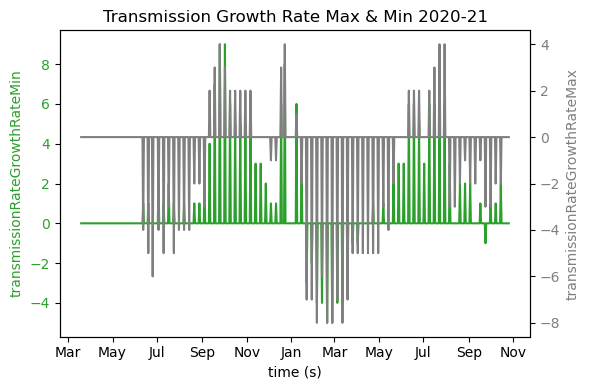

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
myFmt = mdates.DateFormatter ('%b')

data1=timeseriesdf['transmissionRateGrowthRateMax']
data2=timeseriesdf['transmissionRateGrowthRateMin']

fig, ax1 = plt.subplots()

color = 'tab:green'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('transmissionRateGrowthRateMin', color=color)
ax1.plot(data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.xaxis.set_major_formatter(myFmt)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
plt.title('Transmission Growth Rate Max & Min 2020-21')
color = 'tab:grey'
ax2.set_ylabel('transmissionRateGrowthRateMax', color=color)  # we already handled the x-label with ax1
ax2.plot(data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.xaxis.set_major_formatter(myFmt)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()



In [14]:
#our experiment
#plt.plot(timeseriesdf)
#plt.ylabel('some numbers')
#plt.ylim([-10, 50])
#plt.show()

In [15]:
#timeseriesdf.plot() # easy peasy...

In [16]:
#timeseriesdf.plot(logy=True)

## Interactive Graphs

#### Used pickle to make interactive graphs.

In [17]:
#Converting our data into the pickle to make sure it is interactive

In [18]:
timeseriesdf.to_pickle("timeseriesdf.pkl")

In [19]:
#datadic=data['body'][0] # data['data'] is a list
#datadic

In [20]:
from IPython.display import clear_output
import ipywidgets as wdg
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
%matplotlib inline
# make figures larger
plt.rcParams['figure.dpi'] = 100

In [22]:
# our API access function. This will be called by the button when it is clicked
def access_api(button):
    # Ignore the button parameter
    #
    # put code for polling the API here
    #
    # after all is done, you can switch the icon on the button to a "check" sign
    # and optionally disable the button - it won't be needed again.
    apibutton.icon="check"
    apibutton.disabled=True

# see the doc for the parameters    
#THE BELOW CODE IS THE CODE FOR THE BUTTON
apibutton=wdg.Button(
    description='Refresh data',
    disabled=False,
    button_style='success', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Click to download current Public Health England data',
    icon='download' # (FontAwesome names without the `fa-` prefix)
)

# register the callback function with the button
apibutton.on_click(access_api)#no brackets 

# this is an iPython function that generalises print for Jupyter Notebooks; we use it to 
# display the widgets
display(apibutton)

Button(button_style='success', description='Refresh data', icon='download', style=ButtonStyle(), tooltip='Clic…

#### Read data from pickle object

In [23]:
timeseriesdf=pd.read_pickle("timeseriesdf.pkl")

In [24]:
series=wdg.SelectMultiple(
    options=['hospitalCases', 'newAdmissions', 'transmissionRateGrowthRateMax','transmissionRateGrowthRateMin'],
    value=['hospitalCases', 'newAdmissions', 'transmissionRateGrowthRateMax','transmissionRateGrowthRateMin'],
    rows=3,
    description='Stats:',
    disabled=False
)

scale=wdg.RadioButtons(
    options=['linear', 'log'],
#    value='pineapple', # Defaults to 'pineapple'
#    layout={'width': 'max-content'}, # If the items' names are long
    description='Scale:',
    disabled=False
)

# try replacing HBox with a VBox
controls=wdg.HBox([series, scale])

def timeseries_graph(gcols, gscale):
    if gscale=='linear':
        logscale=False
    else:
        logscale=True
    ncols=len(gcols)
    if ncols>0:
        timeseriesdf[list(gcols)].plot(logy=logscale)
        plt.show() # important - graphs won't update if this is missing 
    else:
        print("Click to select data for graph")
        print("(CTRL-Click to select more than one category)")

# keep calling timeseries_graph(gcols=value_of_series, gscale=value_of_scale); 
# capture output in widget graph   
graph=wdg.interactive_output(timeseries_graph, {'gcols': series, 'gscale': scale})

display(controls, graph)

Output()

#### Drop Down functionality for interactive graph button configuration 

In [25]:
from IPython.display import clear_output
import ipywidgets as wdg
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
from uk_covid19 import Cov19API

In [26]:
%matplotlib inline
# make figures larger
plt.rcParams['figure.dpi'] = 100

In [27]:
# Load JSON files and store the raw data in some variable. Edit as appropriate
jsondata={}

In [28]:
with open ("nhsRegion_2021-10-26.json","rt") as INFILE:
    jsondata=json.load(INFILE)

In [29]:
def wrangle_data(rawdata):
    """ Parameters: rawdata - data from json file or API call. Returns a dataframe.
    Edit to include the code that wrangles the data, creates the dataframe and fills it in. """
    
    datalist=rawdata['body']
    
    index=pd.date_range(startdate, enddate, freq='D')
    timeseriesdf=pd.DataFrame(index=index, columns=['hospitalCases', 'newAdmissions', 'transmissionRateGrowthRateMax','transmissionRateGrowthRateMin'])
   
    for entry in datalist: # each entry is a dictionary with date, cases, hospital and deaths
        date=parse_date(entry['date'])
        for column in ['hospitalCases', 'newAdmissions', 'transmissionRateGrowthRateMax','transmissionRateGrowthRateMin']:
            # check that nothing is there yet - just in case some dates are duplicated,
            # maybe with data for different columns in each entry
            if pd.isna(timeseriesdf.loc[date, column]): 
                # replace None with 0 in our data 
                value= float(entry[column]) if entry[column]!=None else 0.0
                # this is the way you access a specific location in the dataframe - use .loc
                # and put index,column in a single set of [ ]
                timeseriesdf.loc[date, column]=value
            
    # fill in any remaining "holes" due to missing dates
    timeseriesdf.fillna(0.0, inplace=True)  
    return timeseriesdf
    
    
    
    
    #df=pd.DataFrame(index=range(0,100), columns=['One', 'Two'])
    # we have no real data to wrangle, so we just generate two random walks.
    #one=two=0.0
    #for i in range(0,100):
    #    df.loc[i,'One']=one
    #    df.loc[i,'Two']=two
    #   one+=np.random.randn()
    #    two+=2*np.random.randn()
    #return df

# putting the wrangling code into a function allows you to call it again after refreshing the data through 
# the API. You should call the function directly on the JSON data when the dashboard starts, by including 
# the call in the cell as below:
df=wrangle_data(jsondata) # df is the dataframe for plotting

In [30]:
# Place your API access code in this function. Do not call this function directly; it will be called by 
# the button callback. 
def access_api(E12000007):
    """ Accesses the PHE API. Returns raw data in the same format as data loaded from the "canned" JSON file. """
    return {} # return data read from the API

In [31]:
# Printout from this function will be lost in Voila unless captured in an
# output widget - therefore, we give feedback to the user by changing the 
# appearance of the button
def api_button_callback(button):
    """ Button callback - it must take the button as its parameter (unused in this case).
    Accesses API, wrangles data, updates global variable df used for plotting. """
    # Get fresh data from the API. If you have time, include some error handling
    # around this call.
    apidata=access_api()
    # wrangle the data and overwrite the dataframe for plotting
    global df
    df=wrangle_data(apidata)
    # the graph won't refresh until the user interacts with the widget.
    # this function simulates the interaction, see Graph and Analysis below.
    # you can omit this step in the first instance
    refresh_graph()
    # after all is done, you can switch the icon on the button to a "check" sign
    # and optionally disable the button - it won't be needed again. You can use icons
    # "unlink" or "times" and change the button text to "Unavailable" in case the 
    # api call fails.
    apibutton.icon="check"
    # apibutton.disabled=True

    
apibutton=wdg.Button(
    description='information', # you may want to change this...// changed to information
    disabled=False,
    button_style='info', # 'success', 'info', 'warning', 'danger' or ''
    tooltip="Keep calm and carry on",
    # FontAwesome names without the `fa-` prefix - try "download"
    icon='exclamation-triangle'
)

# remember to register your button callback function with the button
apibutton.on_click(api_button_callback) # the name of your function inside these brackets

display(apibutton)

# run all cells before clicking on this button

Button(button_style='info', description='information', icon='exclamation-triangle', style=ButtonStyle(), toolt…

In [32]:
def plot_random_walk(walk):
    df[walk].plot()
    plt.show() # important! update won't work properly without this
    
whichwalk=wdg.Dropdown(
    options=['hospitalCases', 'newAdmissions', 'transmissionRateGrowthRateMax','transmissionRateGrowthRateMin'],
    value='newAdmissions',
    description='Metrics: ',
    disabled=False,
)

def refresh_graph():
    """ We change the value of the widget in order to force a redraw of the graph;
    this is useful when the data have been updated. This is a bit of a gimmick; it
    needs to be customised for one of your widgets. """
    current=whichwalk.value
    if current==whichwalk.options[0]:
        other=whichwalk.options[1]
    else:
        other=whichwalk.options[0]
    whichwalk.value=other # forces the redraw
    whichwalk.value=current # now we can change it back
    
    
graph=wdg.interactive_output(plot_random_walk, {'walk': whichwalk})
    
display(whichwalk, graph)

Dropdown(description='Metrics: ', index=1, options=('hospitalCases', 'newAdmissions', 'transmissionRateGrowthR…

Output()